In [122]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [100]:
# Load the CSV file
df = pd.read_csv('All_features_All_Grades.csv')


In [101]:
# Split the data into features (X) and labels (y)
X = df.iloc[:, :6].values
y = df.iloc[:, 6].values

In [102]:
# Encode the labels
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [103]:
X = X.reshape(X.shape[0], X.shape[1], 1)

In [104]:
num_classes=5

In [125]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert target values to one-hot encoded format
y_train_encoded = to_categorical(y_train, num_classes=5)
y_test_encoded = to_categorical(y_test, num_classes=5)


(1156, 5)

In [138]:
# Reshape the input data to fit the CNN model
# Reshape the input features for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


1

In [150]:
###### Define the CNN model architecture
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 2, activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [151]:
from tensorflow.keras.utils import to_categorical

# Convert target values to one-hot encoded format
y_train_encoded = to_categorical(y_train, num_classes=5)
y_test_encoded = to_categorical(y_test, num_classes=5)

tf.keras.backend.clear_session()

In [152]:
#X_train.shape
X_test.shape
y_train_encoded.shape
y_test_encoded.shape

(1156, 5)

In [153]:
# Fit the model with the updated target values
model.fit(X_train, y_train_encoded, epochs=70, batch_size=32, validation_data=(X_test, y_test_encoded))

Epoch 1/70
145/145 [==============================] - 1s 4ms/step - loss: 1.4263 - accuracy: 0.3907 - val_loss: 1.4064 - val_accuracy: 0.4014
Epoch 2/70
145/145 [==============================] - 0s 2ms/step - loss: 1.3990 - accuracy: 0.3940 - val_loss: 1.4042 - val_accuracy: 0.3979
Epoch 3/70
145/145 [==============================] - 0s 2ms/step - loss: 1.3960 - accuracy: 0.3940 - val_loss: 1.4005 - val_accuracy: 0.4048
Epoch 4/70
145/145 [==============================] - 0s 2ms/step - loss: 1.3932 - accuracy: 0.3981 - val_loss: 1.4016 - val_accuracy: 0.4066
Epoch 5/70
145/145 [==============================] - 0s 2ms/step - loss: 1.3908 - accuracy: 0.3966 - val_loss: 1.4059 - val_accuracy: 0.3936
Epoch 6/70
145/145 [==============================] - 0s 2ms/step - loss: 1.3914 - accuracy: 0.3949 - val_loss: 1.4024 - val_accuracy: 0.4066
Epoch 7/70
145/145 [==============================] - 0s 2ms/step - loss: 1.3874 - accuracy: 0.3998 - val_loss: 1.4021 - val_accuracy: 0.4005
Epoch 

In [146]:
# Save the trained model
save_model(model,'trained_model.h5')

print(X_test.shape)
print(y_test.shape)

(1156, 6, 1)
(1156, 1)


In [147]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

37/37 [==============================] - 0s 1ms/step - loss: 1.4358 - accuracy: 0.3832
Test Loss: 1.435776710510254, Test Accuracy: 0.383217990398407


In [157]:
# Make predictions on test data
y_pred = model.predict(X_test)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(y_pred, axis=1)

# Convert true labels to class labels
true_labels = np.argmax(y_test, axis=1)

# Compare predicted labels with true labels
for i in range(len(X_test)):
    print(f"Sample {i+1}: Predicted label={predicted_labels[i]}, True label={true_labels[i]}")

Sample 1: Predicted label=2, True label=0
Sample 2: Predicted label=0, True label=0
Sample 3: Predicted label=0, True label=0
Sample 4: Predicted label=2, True label=0
Sample 5: Predicted label=0, True label=0
Sample 6: Predicted label=0, True label=0
Sample 7: Predicted label=0, True label=0
Sample 8: Predicted label=0, True label=0
Sample 9: Predicted label=0, True label=0
Sample 10: Predicted label=0, True label=0
Sample 11: Predicted label=0, True label=0
Sample 12: Predicted label=0, True label=0
Sample 13: Predicted label=0, True label=0
Sample 14: Predicted label=0, True label=0
Sample 15: Predicted label=0, True label=0
Sample 16: Predicted label=2, True label=0
Sample 17: Predicted label=2, True label=0
Sample 18: Predicted label=0, True label=0
Sample 19: Predicted label=0, True label=0
Sample 20: Predicted label=0, True label=0
Sample 21: Predicted label=2, True label=0
Sample 22: Predicted label=0, True label=0
Sample 23: Predicted label=0, True label=0
Sample 24: Predicted

In [158]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print(cm)

[[852  58 178  53  15]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]


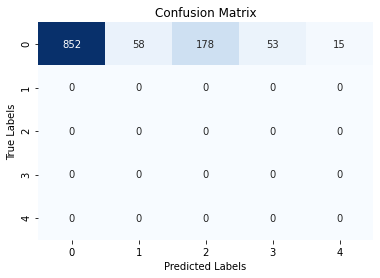

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a confusion matrix named 'confusion_matrix'
confusion_matrix = [[852,58,178,53,15],
                    [  0,   0 ,  0,   0 ,  0],
                    [  0 ,  0  , 0  , 0 ,  0],
                    [  0 ,  0  , 0 ,  0,   0],
                    [  0  , 0  , 0 ,  0 ,  0]]

# Create a figure and axis
fig, ax = plt.subplots()

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Set axis labels and title
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()